In [1]:
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

# 1. SIMULACIÓN DE DATOS CON 5 VARIABLES CORRELACIONADAS
# OBJETIVO: Generar datos con redundancia para demostrar la capacidad de compresión de PCA
np.random.seed(42) 

# Generación de variables con diferentes niveles de correlación
F1 = np.random.rand(150) * 10
F2 = F1 * 2 + np.random.normal(0, 1, 150)  
F3 = F1 * 0.5 + np.random.normal(0, 0.5, 150)
F4 = np.random.rand(150) * 5  # Variable independiente, poca correlación
F5 = F4 * 1.5 + np.random.normal(0, 1, 150)  

# Crear DataFrame con las 5 variables simuladas
df_alta_dim = pd.DataFrame({
    'F1': F1, 
    'F2': F2, 
    'F3': F3, 
    'F4': F4, 
    'F5': F5
})

print(f"Dimensiones originales: {df_alta_dim.shape}")  
print("\nPrimeras filas de los datos originales:")
print(df_alta_dim.head())

# Análisis de correlaciones para demostrar redundancia
print("\nMATRIZ DE CORRELACIONES (demuestra redundancia):")
correlaciones = df_alta_dim.corr()
print(correlaciones.round(3))


Dimensiones originales: (150, 5)

Primeras filas de los datos originales:
         F1         F2        F3        F4        F5
0  3.745401   7.298441  1.746417  0.567788  1.490274
1  9.507143  19.315833  4.129680  3.357866  3.375279
2  7.319939  14.605167  4.476175  2.601539  3.836228
3  5.986585  10.804492  2.278222  3.861592  4.581372
4  1.560186   4.263196  0.560071  2.600818  3.249390

MATRIZ DE CORRELACIONES (demuestra redundancia):
       F1     F2     F3     F4     F5
F1  1.000  0.985  0.957  0.012  0.059
F2  0.985  1.000  0.944  0.037  0.080
F3  0.957  0.944  1.000  0.014  0.051
F4  0.012  0.037  0.014  1.000  0.880
F5  0.059  0.080  0.051  0.880  1.000


In [2]:
# 2. ESTANDARIZACIÓN DE DATOS (OBLIGATORIO PARA PCA)
scaler = StandardScaler()
datos_escalados_pca = scaler.fit_transform(df_alta_dim)
print("\nDatos estandarizados para PCA")


Datos estandarizados para PCA


In [3]:
# 3. APLICACIÓN DE PCA Y ANÁLISIS DE VARIANZA
# OBJETIVO: Ejecutar PCA y calcular cuánta información retiene cada componente

# 1. APLICAR PCA CON TODOS LOS COMPONENTES POSIBLES
pca = PCA(n_components=None)  
pca.fit(datos_escalados_pca) 

# 2. VARIANZA EXPLICADA POR CADA COMPONENTE PRINCIPAL
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, 1):
    print(f"PC{i}: {var:.3f} ({var*100:.1f}%)")


# 3. VARIANZA ACUMULADA
varianza_acumulada = np.cumsum(varianza_explicada)
print("\nVARIANZA ACUMULADA:")
for i, var_acum in enumerate(varianza_acumulada, 1):
    print(f"PC1 a PC{i}: {var_acum:.3f} ({var_acum*100:.1f}%)")


PC1: 0.587 (58.7%)
PC2: 0.374 (37.4%)
PC3: 0.024 (2.4%)
PC4: 0.012 (1.2%)
PC5: 0.003 (0.3%)

VARIANZA ACUMULADA:
PC1 a PC1: 0.587 (58.7%)
PC1 a PC2: 0.961 (96.1%)
PC1 a PC3: 0.985 (98.5%)
PC1 a PC4: 0.997 (99.7%)
PC1 a PC5: 1.000 (100.0%)


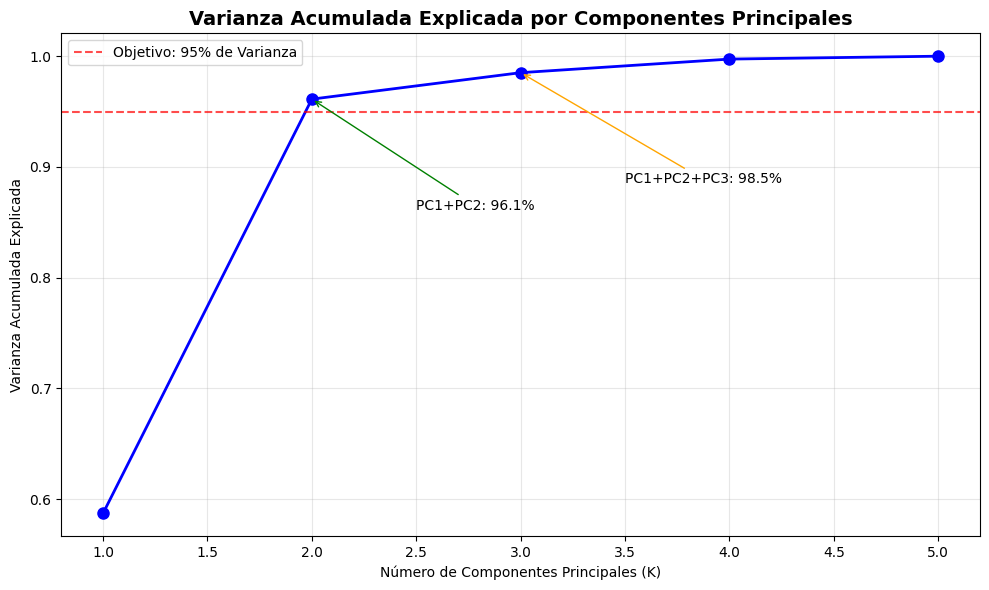

In [4]:
# 4. GRÁFICO DE VARIANZA EXPLICADA ACUMULADA (GRÁFICO DE SEDIMENTO)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1),  
         varianza_acumulada,                     
         marker='o',                          
         linestyle='-',                        
         linewidth=2,                       
         markersize=8,                        
         color='blue')  

plt.title('Varianza Acumulada Explicada por Componentes Principales', 
          fontsize=14, fontweight='bold')
plt.xlabel('Número de Componentes Principales (K)')
plt.ylabel('Varianza Acumulada Explicada')

# Línea de referencia para el objetivo del 95% de varianza
plt.axhline(y=0.95,               
            color='red',       
            linestyle='--',          
            alpha=0.7,            
            label='Objetivo: 95% de Varianza')  

plt.grid(True, alpha=0.3)  
plt.legend()  

# Añadir anotaciones para puntos clave
plt.annotate( 
f'PC1+PC2: {varianza_acumulada[1]*100:.1f}%', 
             xy=(2, varianza_acumulada[1]),  
             xytext=(2.5, varianza_acumulada[1]-0.1), 
             arrowprops=dict(arrowstyle='->', color='green'))  

plt.annotate(  # Segunda anotación para 3 componentes
f'PC1+PC2+PC3: {varianza_acumulada[2]*100:.1f}%',  
             xy=(3, varianza_acumulada[2]),  
             xytext=(3.5, varianza_acumulada[2]-0.1), 
             arrowprops=dict(arrowstyle='->', color='orange'))  

plt.tight_layout() 
plt.show()

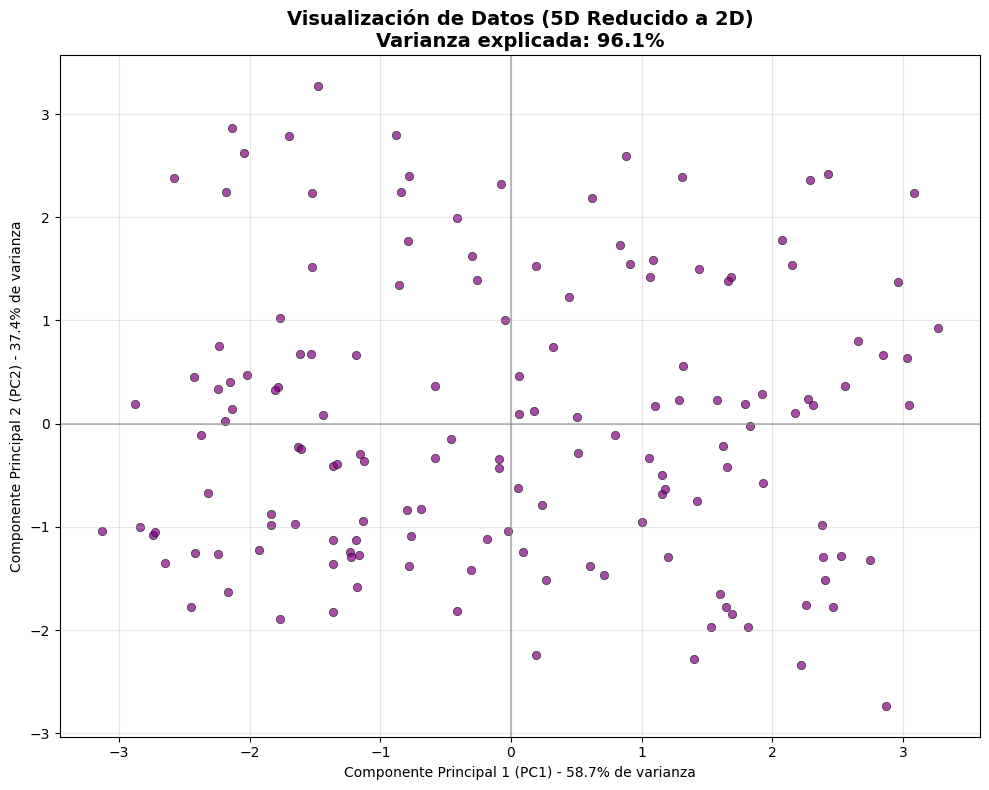

In [5]:
# 5. VISUALIZACIÓN DE DATOS REDUCIDOS

# 1. REDUCIR DIMENSIONALIDAD A 2 COMPONENTES PRINCIPALES
pca_2d = PCA(n_components=2)  
datos_reducidos_2d = pca_2d.fit_transform(datos_escalados_pca)

# 2. CREAR DATAFRAME CON LOS NUEVOS COMPONENTES
df_pca = pd.DataFrame(data=datos_reducidos_2d,  
                      columns=['PC1', 'PC2']) 

# 3. VISUALIZACIÓN 2D DE LOS DATOS REDUCIDOS
plt.figure(figsize=(10, 8))

# Crear scatter plot de PC1 vs PC2
plt.scatter(df_pca['PC1'],         
            df_pca['PC2'],       
            alpha=0.7,         
            c='purple',           
            edgecolors='black',     
            linewidth=0.5)          

plt.title('Visualización de Datos (5D Reducido a 2D)\n' +
          f'Varianza explicada: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%', 
          fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal 1 (PC1) - ' + 
           f'{pca_2d.explained_variance_ratio_[0]*100:.1f}% de varianza')
plt.ylabel('Componente Principal 2 (PC2) - ' + 
           f'{pca_2d.explained_variance_ratio_[1]*100:.1f}% de varianza')

plt.grid(True, alpha=0.3) 
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5) 
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.5) 

plt.tight_layout()
plt.show()